In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
df = pd.read_csv("PopulationDataset.csv")
df.head()

,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
0,2020,China,1439323776,0.39,5540090,-348399.0,38.4,1.69,153,60.8,875075919.0,18.47,7794798739,1
1,2019,China,1433783686,0.43,6135900,-348399.0,37.0,1.65,153,59.7,856409297.0,18.59,7713468100,1
2,2018,China,1427647786,0.47,6625995,-348399.0,37.0,1.65,152,58.6,837022095.0,18.71,7631091040,1
3,2017,China,1421021791,0.49,6972440,-348399.0,37.0,1.65,151,57.5,816957613.0,18.83,7547858925,1
4,2016,China,1414049351,0.51,7201481,-348399.0,37.0,1.65,151,56.3,796289491.0,18.94,7464022049,1


In [3]:
#missing value
print(df.isnull().sum())

Year                                0
Country                             0
Population                          0
Yearly % Change                     0
Yearly Change                       0
Migrants (net)                    595
Median Age                        595
Fertility Rate                    595
Density (P/Km²)                     0
Urban Pop %                       113
Urban Population                  113
Country's Share of World Pop %      0
World Population                    0
Country Global Rank                 0
dtype: int64


In [4]:
#splitting the dataframe based on the countries (Making a dataframe dictionary)

Cnt = df.Country.unique()
DataFrameDict = {elem : pd.DataFrame for elem in Cnt}
for key in DataFrameDict.keys():
  DataFrameDict[key] = df[:][df.Country == key]

In [5]:
#remaning the columns to allow selection
d = {"Urban Pop %": 10, "Urban Population":11 }
df = df.rename(columns=d)

#interpolating the values for urban population and urban population percentage
cols=[10,11]
df[cols] = df[cols].interpolate()

#changing the column names back to the original ones
m = {10:"Urban Pop %",11:"Urban Population"}
df = df.rename(columns=m)

#dropping NaN values that can't be computed
df=df.dropna()

<AxesSubplot:>

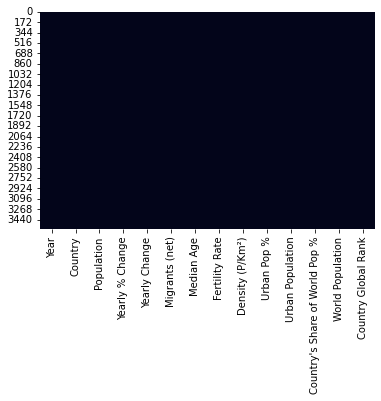

In [6]:
#checking for missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False)

In [7]:
#dropping irrelevant data (country global ranking)
df.drop(['Country Global Rank'], axis = 1)

,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population
0,2020,China,1439323776,0.39,5540090,-348399.0,38.4,1.69,153,60.8,875075919.0,18.47,7794798739
1,2019,China,1433783686,0.43,6135900,-348399.0,37.0,1.65,153,59.7,856409297.0,18.59,7713468100
2,2018,China,1427647786,0.47,6625995,-348399.0,37.0,1.65,152,58.6,837022095.0,18.71,7631091040
3,2017,China,1421021791,0.49,6972440,-348399.0,37.0,1.65,151,57.5,816957613.0,18.83,7547858925
4,2016,China,1414049351,0.51,7201481,-348399.0,37.0,1.65,151,56.3,796289491.0,18.94,7464022049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,1975,Antigua and Barbuda,62675,-0.47,-300,-1404.0,19.0,3.26,142,39.1,24503.0,0.00,4079480606
3613,1970,Antigua and Barbuda,64177,1.80,1096,-240.0,17.4,4.00,146,35.4,22692.0,0.00,3700437046
3614,1965,Antigua and Barbuda,58698,1.63,913,-376.0,17.8,4.30,133,37.9,22252.0,0.00,3339583597
3615,1960,Antigua and Barbuda,54131,1.74,897,-300.0,18.5,4.50,123,40.5,21945.0,0.00,3034949748


In [8]:
#Density column is of type object, hence converting to float
def convert_me(val):
  new_val = val.replace(',','')
  return float(new_val)

df['Density (P/Km²)'].apply(convert_me)

0       153.0
1       153.0
2       152.0
3       151.0
4       151.0
        ...  
3612    142.0
3613    146.0
3614    133.0
3615    123.0
3616    113.0
Name: Density (P/Km²), Length: 3600, dtype: float64

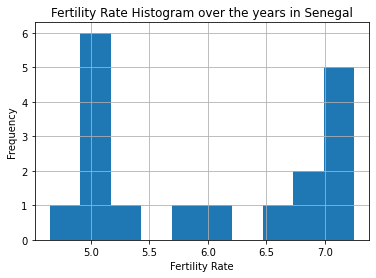

In [9]:
#Fertility Rate Histogram over the years in Senegal

df2 = df[df['Country']=='Senegal'].iloc[::-1]

df2.hist(column = 'Fertility Rate')
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.title('Fertility Rate Histogram over the years in Senegal')

plt.show()

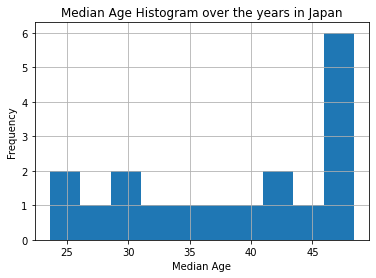

In [10]:
#Median Age Histogram over the years in Japan

df3 = df[df['Country']=='Japan'].iloc[::-1]

df3.hist(column = 'Median Age')
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.title('Median Age Histogram over the years in Japan')

plt.show()

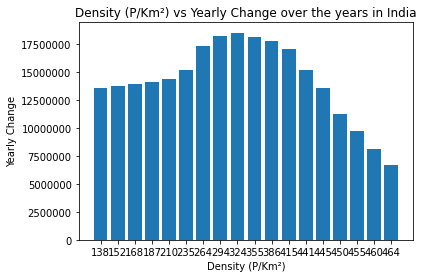

In [11]:
#Bar Chart for Density (P/Km²) vs Yearly Change over the years in India

x = df[df['Country']=='India']['Density (P/Km²)'].iloc[::-1]
y = df[df['Country']=='India']['Yearly Change']

plt.xlabel('Density (P/Km²)')
plt.ylabel('Yearly Change')
plt.title('Density (P/Km²) vs Yearly Change over the years in India')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(x,y)

plt.show()

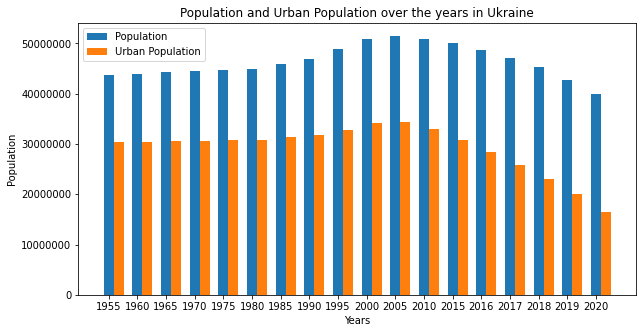

In [12]:
#Bar Chart for Population and Urban Population over the years in Ukraine

barWidth = 0.35
r1 = np.arange(len(df[df['Country']=='India']['Population']))
r2 = [x + barWidth for x in r1]

labels = np.arange(1955, 2020, 5)
labels = np.append(labels, [2016, 2017, 2018, 2019, 2020])
x= np.arange(len(labels))

fig, ax = plt.subplots(figsize = (10, 5))

rect1= ax.bar(r1, df[df['Country']=='Ukraine']['Population'], width = barWidth, label='Population')
rec2= ax.bar(r2, df[df['Country']=='Ukraine']['Urban Population'], width = barWidth, label='Urban Population')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.set_title('Population and Urban Population over the years in Ukraine')

plt.show()

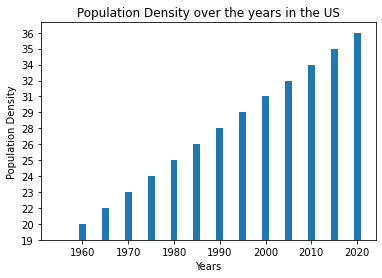

In [13]:
#Bar Chart for Population Density over the years in the USA

x = df[df['Country'] == 'United States']['Year'][::-1]
x.drop([37, 38, 39,40], axis = 0,inplace=True)

y = df[df['Country'] == 'United States']['Density (P/Km²)'][::-1]
y.drop([37, 38, 39,40], axis = 0,inplace=True)

plt.bar(x,y, width = 1.5)

plt.xlabel('Years')
plt.ylabel('Population Density')
plt.title('Population Density over the years in the US')

plt.show()

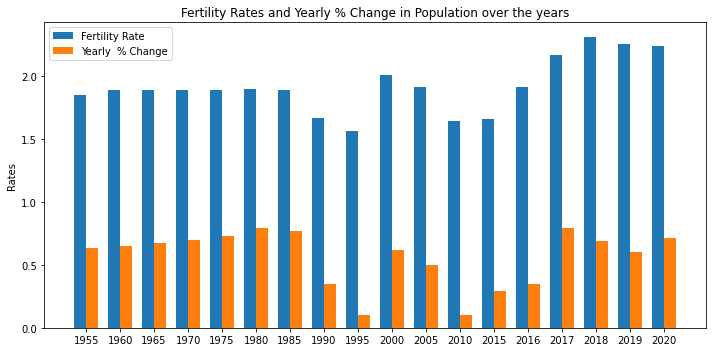

In [14]:
#Bar Chart for Fertility Rate vs Yearly % Change in Sweden

labels = np.arange(1955, 2020, 5)
labels = np.append(labels, [2016, 2017, 2018, 2019, 2020])

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize = (10, 5))

rect1 = ax.bar(x-width/2, df[df['Country'] == 'Sweden']['Fertility Rate'], width, label = 'Fertility Rate')
rect2 = ax.bar(x+width/2, df[df['Country'] == 'Sweden']['Yearly % Change'], width, label = 'Yearly  % Change')

ax.set_ylabel('Rates')
ax.set_title('Fertility Rates and Yearly % Change in Population over the years')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

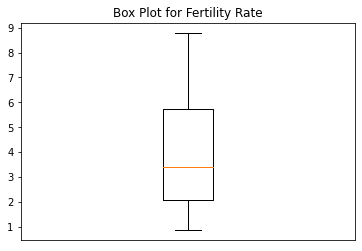

In [15]:
#Box Plot for Fertility Rate of all countries

plt.boxplot(df['Fertility Rate'])
plt.title('Box Plot for Fertility Rate')
plt.xticks([])
plt.show()

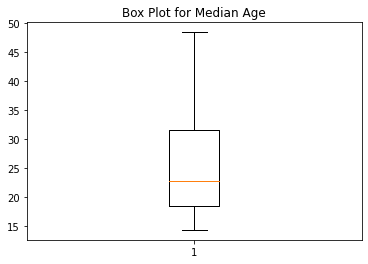

In [16]:
#Box Plot for Median Age of all countries

plt.boxplot(df['Median Age'])
plt.title('Box Plot for Median Age')

plt.show()

In [17]:
df1 = df[df.Country == 'Germany']

In [18]:
def getZscore(array):
  return (array - array.mean(axis=0)) / array.std(axis=0)

def getPvalue(array):
  return scipy.stats.norm.sf(abs(array)) *2

def normalize(array):
  newArray = (array - array.min()) / (array.max() - array.min())
  return newArray

def getValues(array):
  values = {'mean':array.mean(), 'variance':array.var(), 'normalized': normalize(array), 'z-score': getZscore(array)}
  normArr = values['normalized']
  values['normMean'] = round(normArr.mean(), 3)
  values['normVar'] = round(normArr.var(), 3)
  values['pValue']: getPvalue(values['z-score'])
  zscoreArr =  values['z-score']
  values['stdMean'] = round(zscoreArr.mean(), 3)
  values['stdVar'] = round(zscoreArr.var(), 3)
  return values

pop = getValues(np.array(list(df1['Population'])))
percChange = getValues(np.array(list(df1['Yearly % Change'])))
change = getValues(np.array(list(df1['Yearly Change'])))
migrants = getValues(np.array(list(df1['Migrants (net)'])))
medianAge = getValues(np.array(list(df1['Median Age'])))
fertility = getValues(np.array(list(df1['Fertility Rate'])))
density = getValues(np.array(list(df1['Density (P/Km²)'])).astype(np.float))
urbanPopPerc = getValues(np.array(list(df1['Urban Pop %'])))
urbanPop = getValues(np.array(list(df1['Urban Population'])))
worldPopShare = getValues(np.array(list(df1['Country\'s Share of World Pop %'])))
worldPop = getValues(np.array(list(df1['World Population'])))

C:\Users\rafay\AppData\Local\Temp\ipykernel_10864\2131318748.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  density = getValues(np.array(list(df1['Density (P/Km²)'])).astype(np.float))


In [19]:
print('MEAN')
print('Population:', pop['mean'])
print('Yearly % Change:', percChange['mean'])
print('Yearly Change:', change['mean'])
print('Migrants (net):', migrants['mean'])
print('Median Age:', medianAge['mean'])
print('Fertility Rate:', fertility['mean'])
print('Density (P/Km²):', density['mean'])
print('Urban Pop %:', urbanPopPerc['mean'])
print('Urban Population:', urbanPop['mean'])
print('Country\'s Share of World Pop %:', worldPopShare['mean'])
print('World Population:', worldPop['mean'])

print('\n')

print('VARIANCE')
print('Population:', pop['variance'])
print('Yearly % Change:', percChange['variance'])
print('Yearly Change:', change['variance'])
print('Migrants (net):', migrants['variance'])
print('Median Age:', medianAge['variance'])
print('Fertility Rate:', fertility['variance'])
print('Density (P/Km²):', density['variance'])
print('Urban Pop %:', urbanPopPerc['variance'])
print('Urban Population:', urbanPop['variance'])
print('Country\'s Share of World Pop %:', worldPopShare['variance'])
print('World Population:', worldPop['variance'])

MEAN
Population: 79761506.1111111
Yearly % Change: 0.30833333333333335
Yearly Change: 242264.77777777778
Migrants (net): 265542.8333333333
Median Age: 40.25000000000001
Fertility Rate: 1.642222222222222
Density (P/Km²): 228.88888888888889
Urban Pop %: 74.38333333333335
Urban Population: 59395354.38888889
Country's Share of World Pop %: 1.5477777777777777
World Population: 5694505592.888889


VARIANCE
Population: 11027918710644.988
Yearly % Change: 0.08075833333333333
Yearly Change: 49402008954.28396
Migrants (net): 48195961985.58334
Median Age: 22.353611111111107
Fertility Rate: 0.1378283950617284
Density (P/Km²): 90.4320987654321
Urban Pop %: 5.1524999999999945
Urban Population: 17182719931292.125
Country's Share of World Pop %: 0.24708395061728394
World Population: 3.01335681756436e+18


In [20]:
print('NORMALIZED MEAN')
print('Population:', pop['normMean'])
print('Yearly % Change:', percChange['normMean'])
print('Yearly Change:', change['normMean'])
print('Migrants (net):', migrants['normMean'])
print('Median Age:', medianAge['normMean'])
print('Fertility Rate:', fertility['normMean'])
print('Density (P/Km²):', density['normMean'])
print('Urban Pop %:', urbanPopPerc['normMean'])
print('Urban Population:', urbanPop['normMean'])
print('Country\'s Share of World Pop %:', worldPopShare['normMean'])
print('World Population:', worldPop['normMean'])

print('\n')

print('NORMALIZED VARIANCE')
print('Population:', pop['normVar'])
print('Yearly % Change:', percChange['normVar'])
print('Yearly Change:', change['normVar'])
print('Migrants (net):', migrants['normVar'])
print('Median Age:', medianAge['normVar'])
print('Fertility Rate:', fertility['normVar'])
print('Density (P/Km²):', density['normVar'])
print('Urban Pop %:', urbanPopPerc['normVar'])
print('Urban Population:', urbanPop['normVar'])
print('Country\'s Share of World Pop %:', worldPopShare['normVar'])
print('World Population:', worldPop['normVar'])

NORMALIZED MEAN
Population: 0.672
Yearly % Change: 0.525
Yearly Change: 0.549
Migrants (net): 0.496
Median Age: 0.517
Fertility Rate: 0.292
Density (P/Km²): 0.683
Urban Pop %: 0.633
Urban Population: 0.678
Country's Share of World Pop %: 0.316
World Population: 0.582


NORMALIZED VARIANCE
Population: 0.074
Yearly % Change: 0.089
Yearly Change: 0.094
Migrants (net): 0.158
Median Age: 0.163
Fertility Rate: 0.101
Density (P/Km²): 0.074
Urban Pop %: 0.094
Urban Population: 0.087
Country's Share of World Pop %: 0.108
World Population: 0.119


In [21]:
print('STANDARDIZED MEAN')
print('Population:', pop['stdMean'])
print('Yearly % Change:', percChange['stdMean'])
print('Yearly Change:', change['stdMean'])
print('Migrants (net):', migrants['stdMean'])
print('Median Age:', medianAge['stdMean'])
print('Fertility Rate:', fertility['stdMean'])
print('Density (P/Km²):', density['stdMean'])
print('Urban Pop %:', urbanPopPerc['stdMean'])
print('Urban Population:', urbanPop['stdMean'])
print('Country\'s Share of World Pop %:', worldPopShare['stdMean'])
print('World Population:', worldPop['stdMean'])

print('\n')

print('STANDARDIZED VARIANCE')
print('Population:', pop['stdVar'])
print('Yearly % Change:', percChange['stdVar'])
print('Yearly Change:', change['stdVar'])
print('Migrants (net):', migrants['stdVar'])
print('Median Age:', medianAge['stdVar'])
print('Fertility Rate:', fertility['stdVar'])
print('Density (P/Km²):', density['stdVar'])
print('Urban Pop %:', urbanPopPerc['stdVar'])
print('Urban Population:', urbanPop['stdVar'])
print('Country\'s Share of World Pop %:', worldPopShare['stdVar'])
print('World Population:', worldPop['stdVar'])

STANDARDIZED MEAN
Population: 0.0
Yearly % Change: -0.0
Yearly Change: 0.0
Migrants (net): 0.0
Median Age: -0.0
Fertility Rate: 0.0
Density (P/Km²): 0.0
Urban Pop %: -0.0
Urban Population: 0.0
Country's Share of World Pop %: 0.0
World Population: -0.0


STANDARDIZED VARIANCE
Population: 1.0
Yearly % Change: 1.0
Yearly Change: 1.0
Migrants (net): 1.0
Median Age: 1.0
Fertility Rate: 1.0
Density (P/Km²): 1.0
Urban Pop %: 1.0
Urban Population: 1.0
Country's Share of World Pop %: 1.0
World Population: 1.0


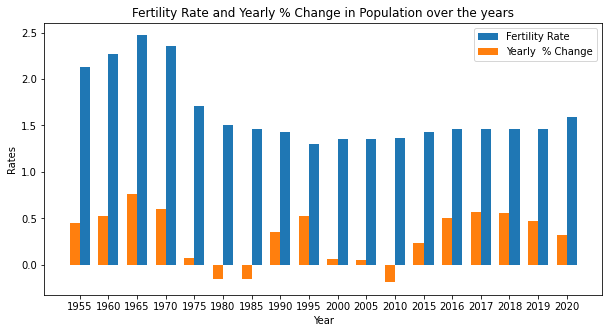

In [22]:
labels = np.array(df1['Year'])

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize = (10, 5))

rect1 = ax.bar(x-width/2, df1['Fertility Rate'], width, label = 'Fertility Rate')
rect2 = ax.bar(x+width/2, df1['Yearly % Change'], width, label = 'Yearly  % Change')

ax.set_ylabel('Rates')
ax.set_xlabel('Year')
ax.set_title('Fertility Rate and Yearly % Change in Population over the years')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.invert_xaxis()
ax.legend()

plt.show()

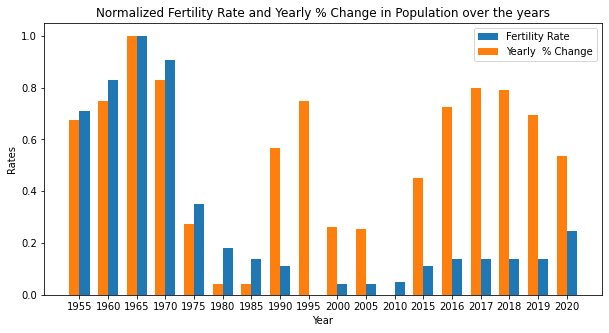

In [23]:
labels = np.array(df1['Year'])

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize = (10, 5))

rect1 = ax.bar(x-width/2, fertility['normalized'], width, label = 'Fertility Rate')
rect2 = ax.bar(x+width/2, percChange['normalized'], width, label = 'Yearly  % Change')

ax.set_ylabel('Rates')
ax.set_xlabel('Year')
ax.set_title('Normalized Fertility Rate and Yearly % Change in Population over the years')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.invert_xaxis()
ax.legend()

plt.show()

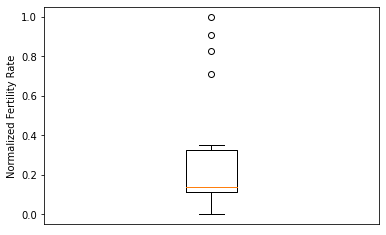

In [24]:
plt.boxplot(fertility['normalized'])
plt.xticks([])
plt.ylabel('Normalized Fertility Rate')
plt.show()

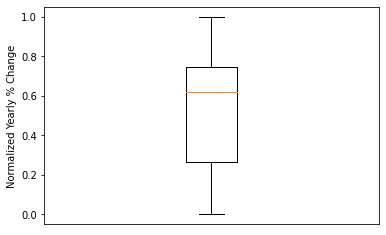

In [25]:
plt.boxplot(percChange['normalized'])
plt.xticks([])
plt.ylabel('Normalized Yearly % Change')
plt.show()

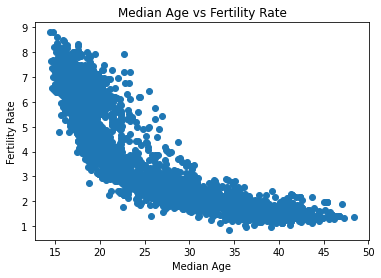

In [26]:
#Median Age vs Fertility Rate Worldwide

plt.scatter(df['Median Age'], df['Fertility Rate'])
plt.xlabel('Median Age')
plt.ylabel('Fertility Rate')
plt.title('Median Age vs Fertility Rate')
plt.show()

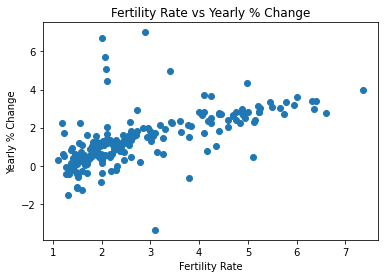

In [27]:
#Fertility Rate and Yearly % Change for 2015 

x = df[df['Year'] == 2015]['Fertility Rate']
y = df[df['Year'] == 2015]['Yearly % Change']

plt.scatter(x, y) 
plt.xlabel('Fertility Rate')
plt.ylabel('Yearly % Change')
plt.title('Fertility Rate vs Yearly % Change')
plt.show()

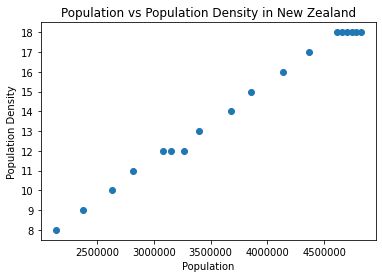

In [28]:
df_nz = DataFrameDict['New Zealand'].iloc[::-1]

plt.scatter(df_nz['Population'],df_nz['Density (P/Km²)'])
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

plt.xlabel('Population')
plt.ylabel('Population Density')
plt.title('Population vs Population Density in New Zealand')
plt.show()

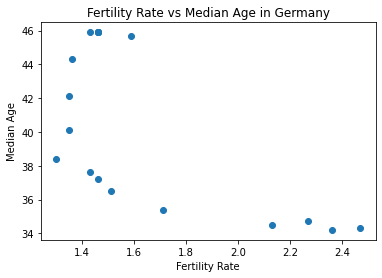

In [29]:
df_germany = df[df['Country']=='Germany']

plt.scatter(df_germany['Fertility Rate'],df_germany['Median Age'])
plt.xlabel('Fertility Rate')
plt.ylabel('Median Age')
plt.title('Fertility Rate vs Median Age in Germany')
plt.show()

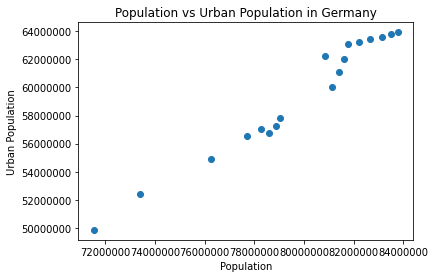

In [30]:
plt.scatter(df_germany['Population'], df_germany['Urban Population'])
plt.xlabel('Population')
plt.ylabel('Urban Population')
plt.title('Population vs Urban Population in Germany')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

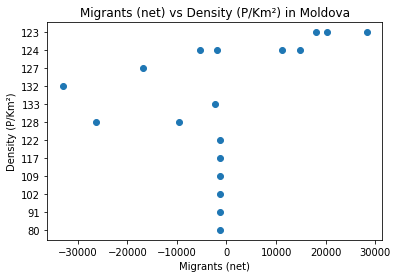

In [31]:
df_mol = df[df['Country']=='Moldova']

plt.scatter(df_mol['Migrants (net)'], df_mol['Density (P/Km²)'].iloc[::-1])
plt.xlabel('Migrants (net)')
plt.ylabel('Density (P/Km²)')
plt.title('Migrants (net) vs Density (P/Km²) in Moldova')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

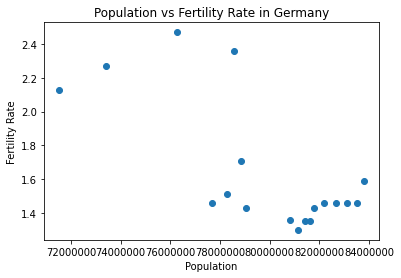

In [32]:
plt.scatter(df_germany['Population'], df_germany['Fertility Rate'])
plt.xlabel('Population')
plt.ylabel('Fertility Rate')
plt.title('Population vs Fertility Rate in Germany')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [33]:
#Testing
df4 = df[df['Country'] == 'Cuba']
df5 = df[df['Country'] == 'Hungary']

In [34]:
print('Cuba\'s Population Mean:', df4['Population'].mean())
print('Hungary\'s Population Mean:', df5['Population'].mean())

Cuba's Population Mean: 10157871.166666666
Hungary's Population Mean: 10082571.333333334


In [35]:
print('Cuba\'s Population Density Mean:', df4['Density (P/Km²)'].astype(float).mean())
print('Hungary\'s Population Density Mean:', df5['Density (P/Km²)'].astype(float).mean())

Cuba's Population Density Mean: 95.44444444444444
Hungary's Population Density Mean: 111.38888888888889


In [36]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

m = df[df['Country'] == 'Hungary']['Fertility Rate'].mean()
print('Hungary\'s Mean Fertility Rate:', m)

Hungary's Mean Fertility Rate: 1.7072222222222222


C:\Users\rafay\AppData\Local\Temp\ipykernel_10864\4177625743.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [37]:
m0 = df[df['Country'] == 'Cuba']['Fertility Rate'].mean()
s0 = df[df['Country'] == 'Cuba']['Fertility Rate'].std()

print(m0, s0)

2.3644444444444446 1.1064634824107376
